In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

  internet sex  traveltime  studytime  freetime  absences  age   iq  marks
0       no   M           2          2         5         6   18  118  73.13
1      yes   M           2          2         2         7   19  107  67.78
2      yes   M           3          3         3         5   18  108  70.84
3       no   F           3          3         4         9   17  100  66.68
4      yes   M           1          4         3         4   19   96  71.88
[[0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [0 1]]


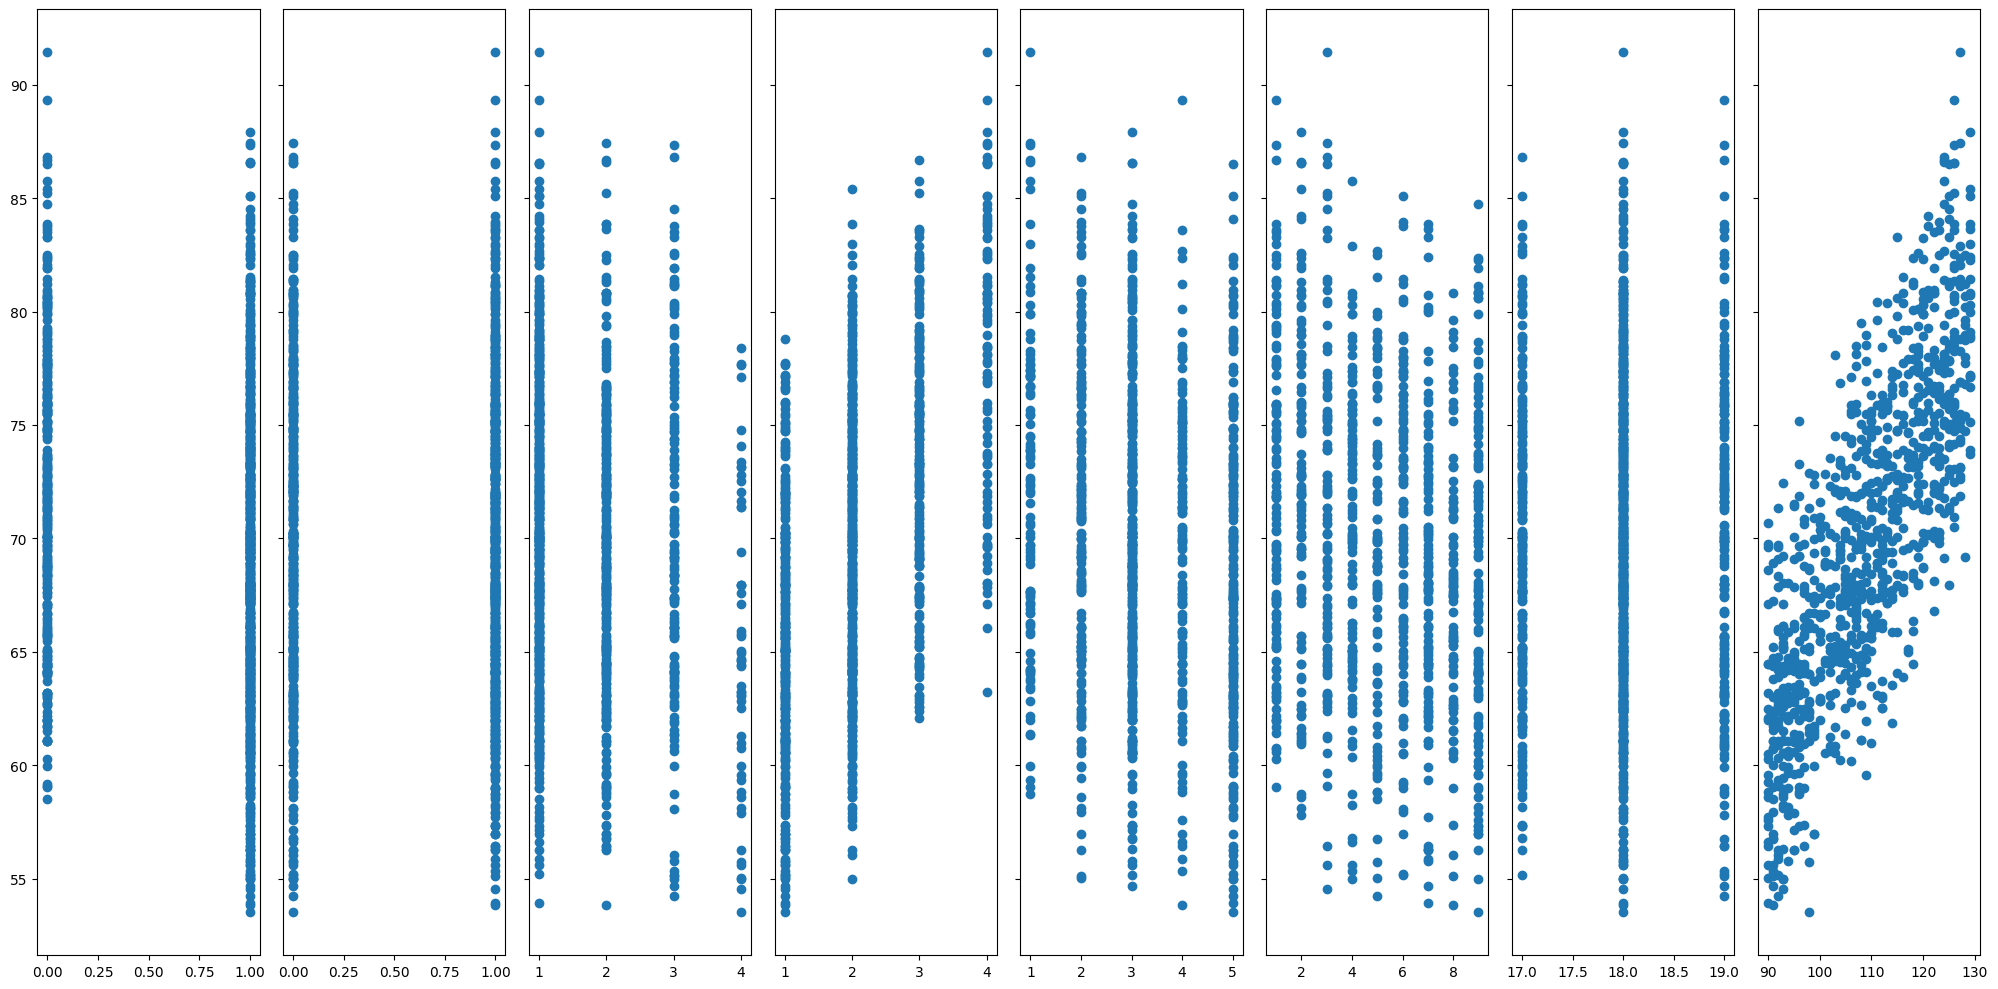

In [208]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')

print(data.head())
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM


yes_no_mapping = {'no': 0, 'yes': 1}
m_f_mapping = {'F': 0, 'M': 1}





def feature_changing(x_train):
  # ---------
    # Your code here
  # ---------
  for key, value in yes_no_mapping.items():
      x_train[x_train[:,0] == key, 0] = value

  for key, value in m_f_mapping.items():
      x_train[x_train[:,1] == key, 1] = value


  return x_train


x_train = feature_changing(x_train)



print ( x_train[0:10, 0:2])



fig,ax=plt.subplots(1, 8, figsize=(20, 10), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)

plt.tight_layout()
plt.show()


In [209]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    # Your code here
  # ---------
    x_mean    = np.mean(x_train, axis=0)                
    x_std = np.std(x_train, axis=0)                  
    x_train = (x_train - x_mean) / x_std      
  

    return x_train,x_std,x_mean

In [210]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    # return cost
  # ---------
    m = x_train.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(x_train[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y_train[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    

    return cost[0]

In [211]:



def gradient_descent(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Choose learning rate yourself
  # ---------
    alpha = 0.1  # Learning rate (adjust as needed)
    m,n = x_train.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,1))
    dj_db = 0

    for i in range(m):                             
        err = ((np.dot(x_train[i], w) + b) - y_train[i])
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * x_train[i][j]   
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m  
    # Update weights and bias using gradient descent
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    return w, b





In [212]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)
old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)


x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b
accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
